<a href="https://colab.research.google.com/github/AlexisD29/Homework/blob/master/Project2_Unsupervised_Learning_Questions_AlexisD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Unsupervised Learning
## The goal of this mini-project is to evaluate the data, decide which clustering algorithm touse, determine how many clusters we should have, and then apply the algorithm to cluster the data.




In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 1. Use the make_blobs class of scikit learn to generate data with the following cluster centers and standard deviations:

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
import numpy as np

blob_centers = np.array(
    [[ 3.8,  3.3],
     [ 0.8,  2.3],
     [-2.5 ,  2.3],
     [-4.8,  3.8],
     [-5.8,  6.8],
     [-8.8,  9.3]])
blob_std = np.array([0.4, 0.5, 0.4, 0.3, 0.3, 0.3])


## 2. Plot the generated data to view the data visually

In [ ]:
X, y = make_blobs(n_samples=1000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

In [ ]:
print(X)

[[-5.49278124  6.97775808]
 [-5.30162224  6.66287112]
 [ 3.15700671  3.37385354]
 ...
 [-2.51505388  2.74132075]
 [-9.09149702  8.88611455]
 [-1.86817114  2.09085599]]


In [ ]:
def plot_clusters(X, y=None):   
   plt.scatter(X[:, 0], X[:, 1], c=y, s=1,color = 'green')    
   plt.xlabel("$x_1$", fontsize=14)  
   plt.ylabel("$x_2$", fontsize=14, rotation=0)
  

Saving figure blobs_plot


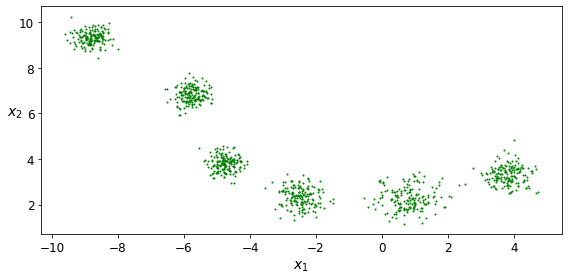

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

## 3. Analyze the plotted data and decide if you should use the K-Means or DBSCAN algorithm to find the clusters? Explain your rationale.

K-Means is good to use because it will converge to a finite number. The issue of converging to the optimal number of clusters(local minimum) can arise. The inertia metric is used to ensure what is the best solution.  It is the sum of the mean squared distances of the closest clusters' centers. The optimal k value is occurs when, the inertia decreases as k increases. DBSCAN can identify any number of clusters with any shape.It is robust to outliers but, cannot capture all clusters with varying densities. It is better suited to find patterns in data that is hard to find manually.

## 4. To find the optimal number of clusters, plot the inertia as afunction of k and analyze the resulting curve. Sometimes it is hard todecide the optimal number of clusters by just loooking at the plottedgraph. Therefore, while analyzing the inertia values, you should also print out the inertia value for each cluster number. To decide the optimal cluster, see when changes between inertia values from onecluster to another becomes less than 15% or so.

k= 1  -  24477.553701116543
k= 2  -  7697.95489222173
k= 3  -  3001.306077609919
k= 4  -  1725.4913833772205
k= 5  -  881.2638633756026
k= 6  -  271.88433405325407
k= 7  -  243.41415087969278
k= 8  -  224.68555174283273
k= 9  -  205.75885565047494


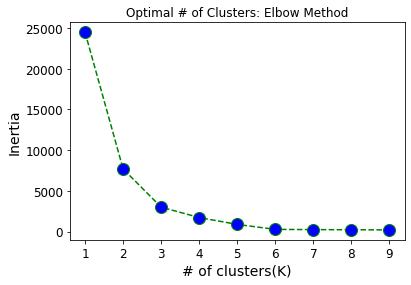

In [ ]:
from sklearn.cluster import KMeans
# Selecting a range of values for K
K = range(1,10)
Inertia= []
# Scikit Learn’s KMeans Algorithm to find sum of squared distances (Inertia)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    Inertia.append(model.inertia_)
    print('k=',k, ' - ' , model.inertia_)
plt.plot(K, Inertia, color='green', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=12)
plt.xlabel('# of clusters(K)')
plt.ylabel('Inertia')
plt.title('Optimal # of Clusters: Elbow Method')
plt.show()

In [ ]:
for i in range(0,len(Inertia)):
            print('Difference between','k=' ,i-1, 'and', 'k=', i, ':')
            print(round((Inertia[i]-Inertia[i-1]),3))
            print('Percent Change:')
            print(round((((Inertia[i]-Inertia[i-1])/Inertia[i-1]) * 100),3),'%')

Difference between k= -1 and k= 0 :
24271.795
Percent Change:
11796.233 %
Difference between k= 0 and k= 1 :
-16779.599
Percent Change:
-68.551 %
Difference between k= 1 and k= 2 :
-4696.649
Percent Change:
-61.012 %
Difference between k= 2 and k= 3 :
-1275.815
Percent Change:
-42.509 %
Difference between k= 3 and k= 4 :
-844.228
Percent Change:
-48.927 %
Difference between k= 4 and k= 5 :
-609.38
Percent Change:
-69.148 %
Difference between k= 5 and k= 6 :
-28.47
Percent Change:
-10.471 %
Difference between k= 6 and k= 7 :
-18.729
Percent Change:
-7.694 %
Difference between k= 7 and k= 8 :
-18.927
Percent Change:
-8.424 %


## 5. Analyze the plotted inertia vs number of clusters (k) graph and decide what the optimal number of clusters should be and explain your decision

Based from the above graph, the optimal number of clusters is 3. The elbow point identifies where the curve of the data points bends. In this case, 3 is where we can see that bend take place at. However, this graph was deceiving because the actually optimal  number of clusters is 6. Results are confirmed by the inertia values and percent change of those values.

##6. Using KMeans class, cluster the generated data into the number of clusters that you decided above. Show the results (predictions).

In [ ]:
k = 6 # The optimal number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
prediction_y = kmeans.fit_predict(X) #The fit_preidict is used to compute the cluster centers and predict the cluster index for each sample.

In [ ]:
print('This gives the array of prediction_y without printing all of its elements:', prediction_y)
print('This will print all the elements in the array prediction_y:')
for i in range(0, len(prediction_y)):    
    print(prediction_y[i]),    

This gives the array of prediction_y without printing all of its elements: [1 1 4 3 0 0 1 0 5 1 0 2 2 2 2 3 5 2 1 0 0 0 0 1 2 4 4 1 1 2 5 3 4 1 0 2 0
 5 1 0 1 2 1 5 0 4 2 5 2 5 4 4 5 5 4 3 3 5 5 5 2 1 2 4 4 0 0 4 2 1 5 2 3 3
 4 5 4 5 3 3 5 0 4 2 5 3 0 5 4 2 0 3 4 2 4 5 0 0 2 4 5 0 5 3 1 3 1 5 0 0 1
 5 1 4 3 3 2 1 5 0 5 4 2 2 5 4 1 2 5 4 0 1 4 1 5 5 4 5 3 4 1 1 0 5 5 4 1 0
 3 2 4 3 5 4 4 0 0 0 2 1 0 0 4 2 2 3 3 0 3 4 2 4 5 3 4 1 5 5 5 5 5 3 3 2 0
 4 2 0 4 2 0 3 5 3 3 2 1 5 2 5 4 5 4 3 5 3 1 5 4 3 0 0 5 1 4 4 0 0 2 1 1 1
 2 5 1 2 3 5 3 1 2 4 0 0 3 3 1 0 5 4 2 0 5 2 5 0 2 5 0 1 2 0 2 2 3 5 5 1 0
 1 2 4 5 2 4 1 0 3 1 0 1 2 5 5 0 4 2 4 3 3 0 2 5 2 4 3 5 1 4 1 5 2 3 4 1 5
 0 3 3 1 1 1 5 2 1 5 0 3 3 1 3 3 3 3 4 2 4 4 5 1 5 3 4 1 2 5 3 5 2 3 4 0 1
 3 4 4 4 4 4 2 4 0 2 0 4 1 5 2 3 1 5 5 3 2 2 3 5 0 0 3 4 4 1 4 2 2 1 2 1 1
 0 3 2 1 2 4 2 4 3 5 2 0 5 0 4 2 4 3 0 3 2 4 4 1 4 3 5 3 2 1 0 3 5 4 0 4 0
 0 3 5 2 3 1 3 4 1 4 2 1 1 1 1 4 1 2 1 4 0 5 0 1 2 3 1 0 0 3 4 1 1 5 4 5 5
 0 0 5 5 1 1 5 0 3 0 0 3 

Note: I was kinda curious to see the full elements of the array. That is the reason why I created this simple for loop for it.

In [ ]:
prediction_y == kmeans.labels_ #Here I am saying, prediction_y equal to kmeans.labels_. 
#I wanted to find out if, both these ndarrays referred to the same object.
#The result below confirms that these ndarrays do.

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## 7. List the centers of each cluster found.

In [ ]:
centers_of_clusters = kmeans.cluster_centers_ # cluster_centers_ are the coordinates of cluster centers.
print('List of the center of each cluster:', centers_of_clusters)

List of the center of each cluster: [[ 0.78474891  2.27680607]
 [-5.78457571  6.82805576]
 [-4.75818678  3.81223735]
 [-8.80329749  9.32925858]
 [ 3.79047512  3.31078469]
 [-2.48674614  2.34648335]]


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Project2_Unsupervised_Learning_Questions-AlexisD.ipynb')

--2020-11-29 02:31:43--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1301 (1.3K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.27K  --.-KB/s    in 0s      

2020-11-29 02:31:43 (49.0 MB/s) - ‘colab_pdf.py’ saved [1301/1301]

Mounted at /content/drive/
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 h

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'